## 🛠️ Preparação dos Dados

In [7]:
#Extração do arquivo tratado
import pandas as pd
dados = pd.read_csv('dados/df_normalizado.csv')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               7267 non-null   object 
 1   Rotatividade             7267 non-null   int64  
 2   Sexo                     7267 non-null   object 
 3   Idoso                    7267 non-null   int64  
 4   Parceiro                 7267 non-null   int64  
 5   Dependentes              7267 non-null   int64  
 6   Termo                    7267 non-null   int64  
 7   Serviço_Telefônico       7267 non-null   int64  
 8   Várias_Linhas            7267 non-null   object 
 9   Serviço_de_Internet      7267 non-null   object 
 10  Segurança_Online         7267 non-null   object 
 11  Backup_Online            7267 non-null   object 
 12  Proteção_do_Dispositivo  7267 non-null   object 
 13  Suporte_Técnico          7267 non-null   object 
 14  Streaming_de_TV         

Remoção de Colunas Irrelevantes

In [8]:
dados = dados.drop('customerID', axis=1)
print(dados.columns)

Index(['Rotatividade', 'Sexo', 'Idoso', 'Parceiro', 'Dependentes', 'Termo',
       'Serviço_Telefônico', 'Várias_Linhas', 'Serviço_de_Internet',
       'Segurança_Online', 'Backup_Online', 'Proteção_do_Dispositivo',
       'Suporte_Técnico', 'Streaming_de_TV', 'Streaming_de_Filmes', 'Contrato',
       'Faturamento_Eletrônico', 'Forma_de_Pagamento', 'Cobrança_Mensal',
       'Cobrança_Total', 'Contas_Diárias'],
      dtype='object')


# Encoding

Transforme as variáveis categóricas em formato numérico para torná-las compatíveis com algoritmos de machine learning.

In [9]:
#Identificando colunas categoricas
categorical_cols = dados.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:")
print(categorical_cols)

Categorical columns:
Index(['Sexo', 'Várias_Linhas', 'Serviço_de_Internet', 'Segurança_Online',
       'Backup_Online', 'Proteção_do_Dispositivo', 'Suporte_Técnico',
       'Streaming_de_TV', 'Streaming_de_Filmes', 'Contrato',
       'Forma_de_Pagamento'],
      dtype='object')


In [10]:
#usando o metodo de codificação get_dummies
df_encoded = pd.get_dummies(data = dados, columns = categorical_cols, dtype = int )
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Rotatividade                                  7267 non-null   int64  
 1   Idoso                                         7267 non-null   int64  
 2   Parceiro                                      7267 non-null   int64  
 3   Dependentes                                   7267 non-null   int64  
 4   Termo                                         7267 non-null   int64  
 5   Serviço_Telefônico                            7267 non-null   int64  
 6   Faturamento_Eletrônico                        7267 non-null   int64  
 7   Cobrança_Mensal                               7267 non-null   float64
 8   Cobrança_Total                                7267 non-null   float64
 9   Contas_Diárias                                7267 non-null   f

    Verificação da Proporção de Evasão

Preciso calcular a proporção de clientes que evadiram em relação aos que permaneceram ativos. Avalie se há desequilíbrio entre as classes, o que pode impactar modelos preditivos e a análise de resultados.

In [11]:
contagem_rotatividade = df_encoded['Rotatividade'].value_counts()
print("Contagem de clientes por Rotatividade:")
print(contagem_rotatividade)

# Calculate and print the proportion
total_customers = contagem_rotatividade.sum()
proporcao_rotatividade = contagem_rotatividade / total_customers

print("\nProporção de clientes por Rotatividade:")
print(proporcao_rotatividade)


print("\nAvaliação de Desequilíbrio de Classes:")
if proporcao_rotatividade[1] < 0.3:
    print("Há um desequilíbrio significativo nas classes (menos de 30% de clientes com Rotatividade).")
else:
    print("As classes estão relativamente equilibradas.")

Contagem de clientes por Rotatividade:
Rotatividade
0    5398
1    1869
Name: count, dtype: int64

Proporção de clientes por Rotatividade:
Rotatividade
0    0.74281
1    0.25719
Name: count, dtype: float64

Avaliação de Desequilíbrio de Classes:
Há um desequilíbrio significativo nas classes (menos de 30% de clientes com Rotatividade).


##  🎯 Correlação e Seleção de Variáveis

    Analise da correlação

Correlation with 'Rotatividade':
Rotatividade                                    1.000000
Contrato_Month-to-month                         0.395584
Segurança_Online_No                             0.335656
Suporte_Técnico_0                               0.330446
Serviço_de_Internet_Fiber optic                 0.300949
Forma_de_Pagamento_Electronic check             0.294626
Backup_Online_No                                0.263111
Proteção_do_Dispositivo_0                       0.246919
Contas_Diárias                                  0.189866
Cobrança_Mensal                                 0.189866
Faturamento_Eletrônico                          0.186666
Idoso                                           0.146733
Streaming_de_Filmes_0                           0.128721
Streaming_de_TV_0                               0.126795
Streaming_de_TV_1                               0.062430
Streaming_de_Filmes_1                           0.060586
Várias_Linhas_1                                 0.03934

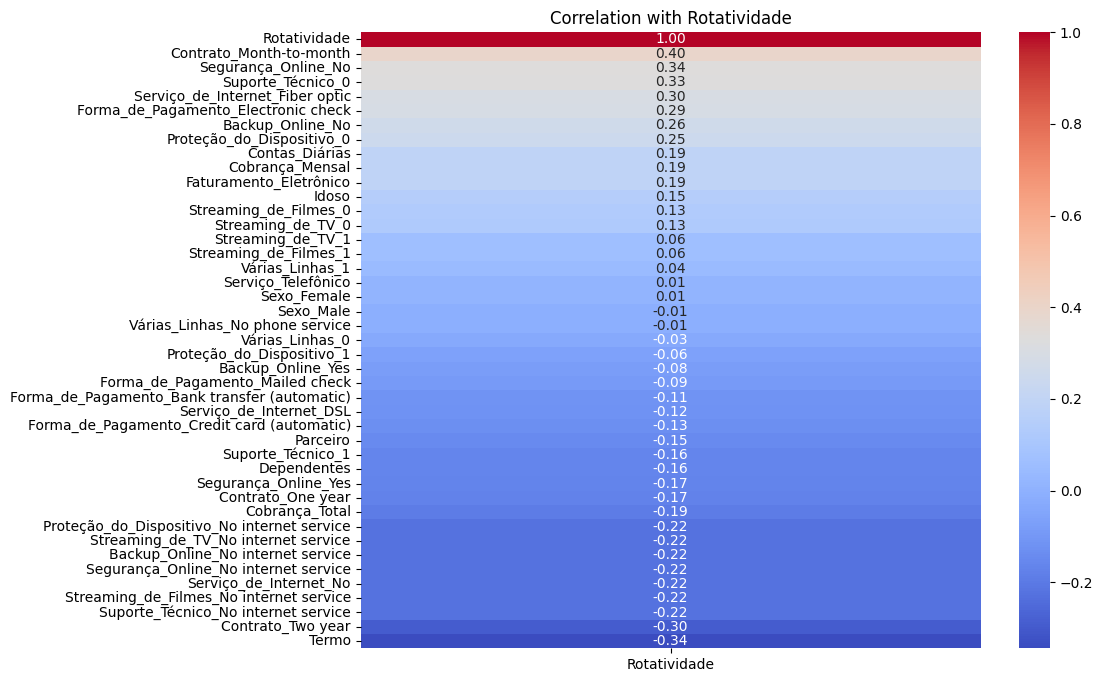

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Get correlations with the target variable 'Rotatividade'
churn_correlation = correlation_matrix['Rotatividade'].sort_values(ascending=False)

print("Correlation with 'Rotatividade':")
print(churn_correlation)

# Optional: Visualize the correlations (e.g., heatmap of top/bottom correlated features)
plt.figure(figsize=(10, 8))
sns.heatmap(churn_correlation.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Rotatividade')
plt.show()

`CORRELAÇÃO POSITIVA:`

Quanto maior o valor, maior a chance de rotatividade

•	`Contrato_Month-to-month`: Clientes com contrato mensal

•	`Segurança_Online_No`: Clientes sem segurança online

•	`Suporte_Técnico_0`: Clientes sem suporte técnico

•	`Serviço_de_Internet_Fiber optic`: Clientes com serviço de internet de fibra óptica

•	`Forma_de_Pagamento_Electronic check`: Clientes que usam cheque eletrônico como forma de pagamento

`CORRELAÇÃO NEGATIVA: `
Quanto menor o valor, menor a chance de rotatividade

•	`Termo:` Quanto maior o termo do contrato, menor a chance de rotatividade.

•	`Contrato_Two year:` Clientes com contrato de dois anos parecem ter uma chance menor de rotatividade.

•	`Serviço_de_Internet_No:` Clientes sem serviço de internet parecem ter uma chance menor de rotatividade.

•	`Segurança_Online_No internet service, Streaming_de_TV_No internet service, Backup_Online_No internet service, Proteção_do_Dispositivo_No internet service, Streaming_de_Filmes_No internet service, Suporte_Técnico_No internet service:`colunas relacionadas à falta de serviço de internet também mostram correlação negativa,

## 🤖 Modelagem Preditiva

    Separando as variáveis com maior correlação

In [13]:
# List of columns to remove
columns_to_drop = [
    'Contas_Diárias',
    'Cobrança_Mensal',
    'Faturamento_Eletrônico',
    'Idoso',
    'Streaming_de_Filmes_0',
    'Streaming_de_TV_0',
    'Streaming_de_TV_1',
    'Streaming_de_Filmes_1',
    'Várias_Linhas_1',
    'Serviço_Telefônico',
    'Sexo_Female',
    'Sexo_Male',
    'Várias_Linhas_No phone service',
    'Várias_Linhas_0',
    'Proteção_do_Dispositivo_1',
    'Backup_Online_Yes',
    'Forma_de_Pagamento_Mailed check',
    'Forma_de_Pagamento_Bank transfer (automatic)',
    'Serviço_de_Internet_DSL',
    'Forma_de_Pagamento_Credit card (automatic)',
    'Parceiro',
    'Suporte_Técnico_1',
    'Dependentes'
]


df_filtered = df_encoded.drop(columns=columns_to_drop)

print("DataFrame after dropping columns:")
print(df_filtered.head())
print("\nColumns remaining:")
print(df_filtered.columns)

DataFrame after dropping columns:
   Rotatividade  Termo  Cobrança_Total  Serviço_de_Internet_Fiber optic  \
0             0      9          593.30                                0   
1             0      9          542.40                                0   
2             1      4          280.85                                1   
3             1     13         1237.85                                1   
4             1      3          267.40                                1   

   Serviço_de_Internet_No  Segurança_Online_No  \
0                       0                    1   
1                       0                    1   
2                       0                    1   
3                       0                    1   
4                       0                    1   

   Segurança_Online_No internet service  Segurança_Online_Yes  \
0                                     0                     0   
1                                     0                     0   
2                  

## Análises Direcionadas

Principais recursos para visualização:
['Contrato_Month-to-month', 'Segurança_Online_No', 'Suporte_Técnico_0', 'Serviço_de_Internet_Fiber optic', 'Streaming_de_Filmes_No internet service', 'Suporte_Técnico_No internet service', 'Contrato_Two year', 'Termo']


/tmp/ipykernel_15516/28114404.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_encoded, x='Rotatividade', y=feature, palette='viridis')


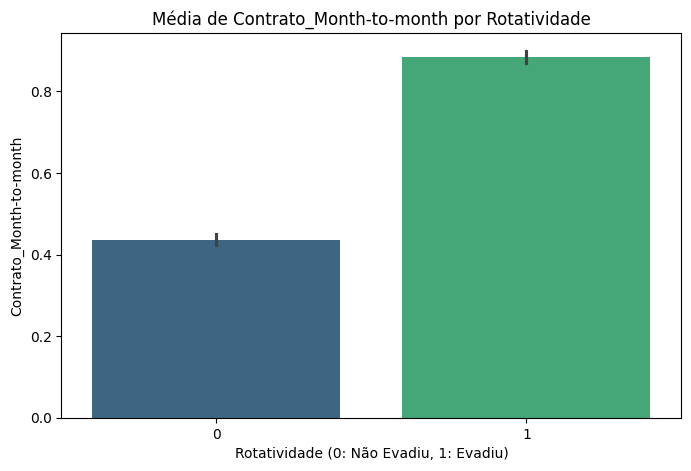

/tmp/ipykernel_15516/28114404.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_encoded, x='Rotatividade', y=feature, palette='viridis')


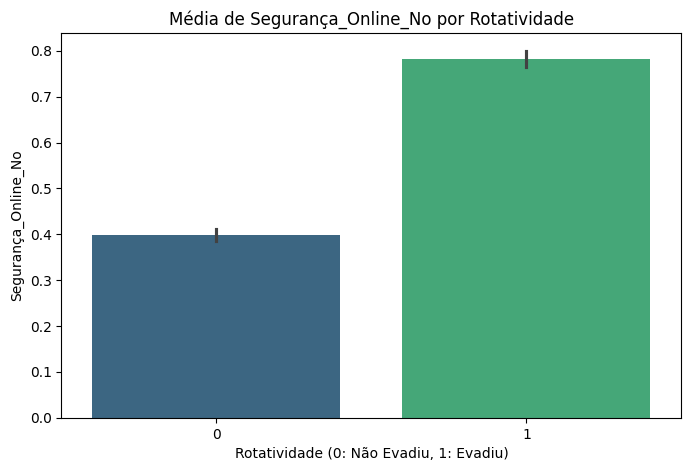

/tmp/ipykernel_15516/28114404.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_encoded, x='Rotatividade', y=feature, palette='viridis')


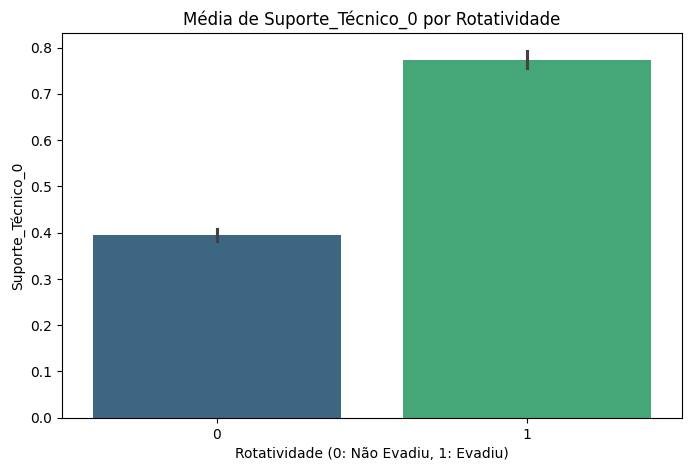

/tmp/ipykernel_15516/28114404.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_encoded, x='Rotatividade', y=feature, palette='viridis')


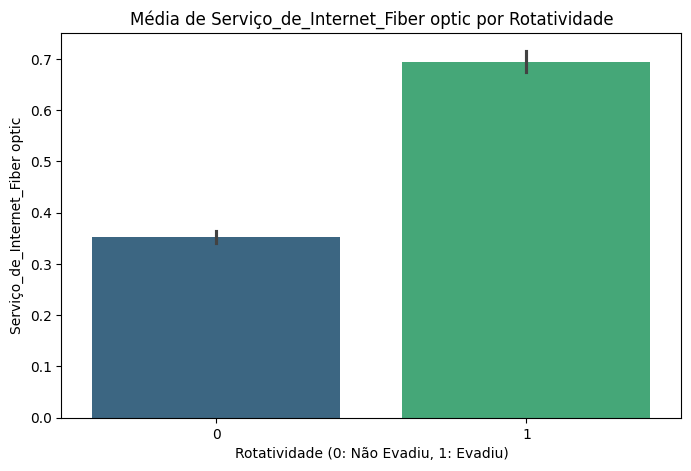

/tmp/ipykernel_15516/28114404.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_encoded, x='Rotatividade', y=feature, palette='viridis')


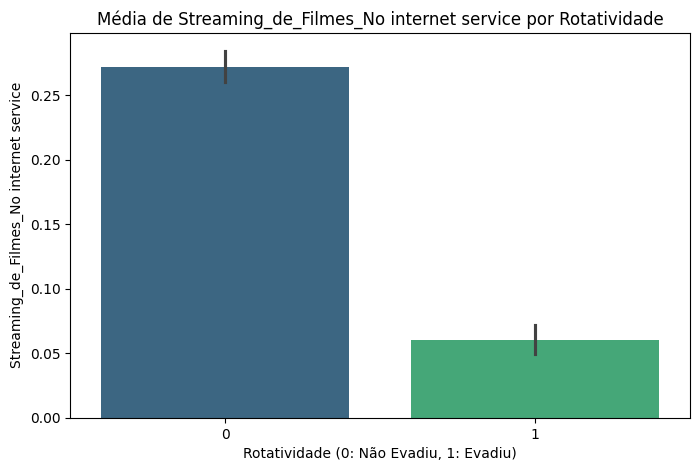

/tmp/ipykernel_15516/28114404.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_encoded, x='Rotatividade', y=feature, palette='viridis')


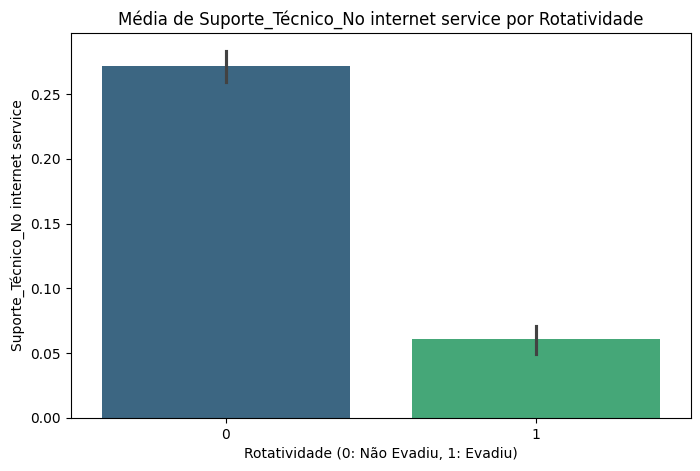

/tmp/ipykernel_15516/28114404.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_encoded, x='Rotatividade', y=feature, palette='viridis')


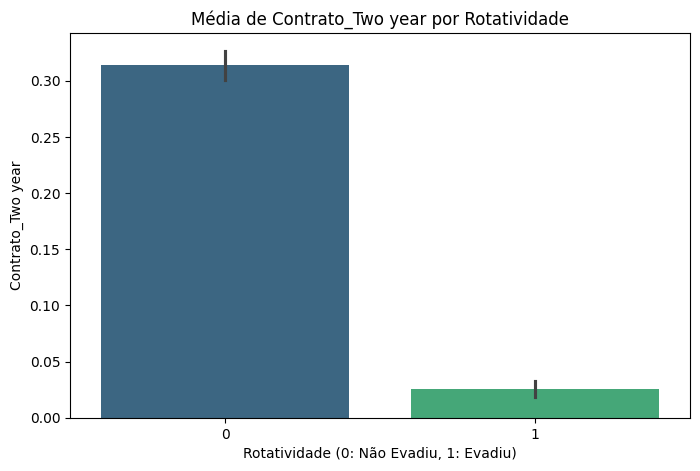

/tmp/ipykernel_15516/28114404.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_encoded, x='Rotatividade', y=feature, palette='viridis')


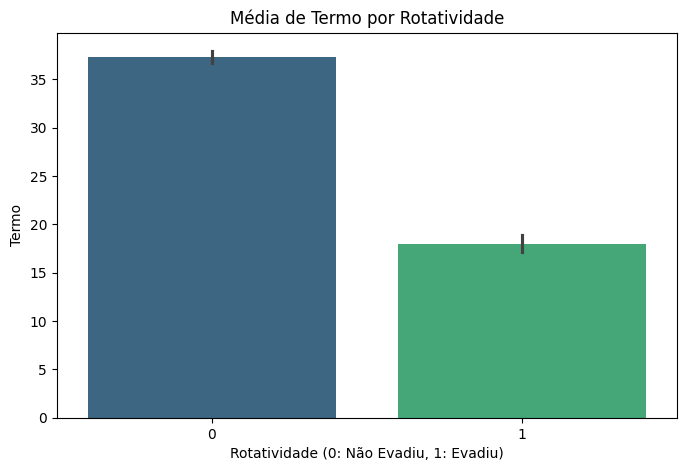

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 4 principais características correlacionadas positiva e negativamente (excluindo a Rotatividade em si)
top_positive_corr = churn_correlation[1:5].index.tolist()
top_negative_corr = churn_correlation[-4:].index.tolist()


top_features = top_positive_corr + top_negative_corr
print("Principais recursos para visualização:")
print(top_features)

# Gráficos de barras para os principais recursos vs. Rotatividade
for feature in top_features:
    plt.figure(figsize=(8, 5))
    if df_encoded[feature].dtype in ['int64', 'float64']:

        sns.barplot(data=df_encoded, x='Rotatividade', y=feature, palette='viridis')
        plt.title(f'Média de {feature} por Rotatividade')
    else:

        sns.barplot(data=df_encoded, x='Rotatividade', y=feature, palette='viridis')
        plt.title(f'Proporção de {feature} por Rotatividade')

    plt.xlabel('Rotatividade (0: Não Evadiu, 1: Evadiu)')
    plt.ylabel(feature)
    plt.show()

    1º passo separar as variavei explicativas da variavel alvo

In [15]:
#x variável explicativa
#y variavel alvo
x = df_encoded.drop(['Rotatividade'], axis = 1)
y = df_encoded['Rotatividade']

    2º passo separar o dataframe entre treino e teste

In [18]:
from sklearn.model_selection import train_test_split


test_set_size = 0.3
random_state_value = 42

X_train, X_test, y_train, y_test =  train_test_split(x, y, test_size=test_set_size, random_state=random_state_value)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (5086, 42)
Shape of X_test: (2181, 42)
Shape of y_train: (5086,)
Shape of y_test: (2181,)


## Treinamento do Modelo Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(max_depth = 5)
model_rf.fit(X_train, y_train)



,n_estimators,100
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Treinamento do Modelo KNN

**Normalizando os dados com MinMaxScaler**

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(X_train)

In [24]:
pd.DataFrame(x_treino_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.0,0.0,0.0,0.944444,1.0,0.0,0.915423,0.838171,0.915423,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.736111,1.0,1.0,0.660199,0.512361,0.660199,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.013889,1.0,0.0,0.328358,0.005901,0.328358,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.180556,1.0,0.0,0.820896,0.151212,0.820896,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.138889,1.0,1.0,0.674627,0.096041,0.674627,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5081,0.0,0.0,0.0,0.652778,1.0,1.0,0.022886,0.108891,0.022886,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5082,0.0,1.0,1.0,0.236111,1.0,0.0,0.560199,0.139992,0.560199,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5083,0.0,1.0,0.0,0.666667,1.0,1.0,0.927363,0.612000,0.927363,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5084,1.0,0.0,0.0,0.388889,1.0,0.0,0.459701,0.215042,0.459701,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier()

In [27]:
knn.fit(x_treino_normalizado, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [28]:
x_teste_normalizado = normalizacao.transform(X_test)

## Avaliação dos Modelos

Avaliar o desempenho do modelo utilizando métricas apropriadas para problemas de classificação (Acurácia, Precisão, Recall, F1-score, Matriz de confusão).


## Avaliação Modelo KNN


Accuracy: 0.7538
Precision: 0.4952
Recall: 0.4831
F1-score: 0.4891


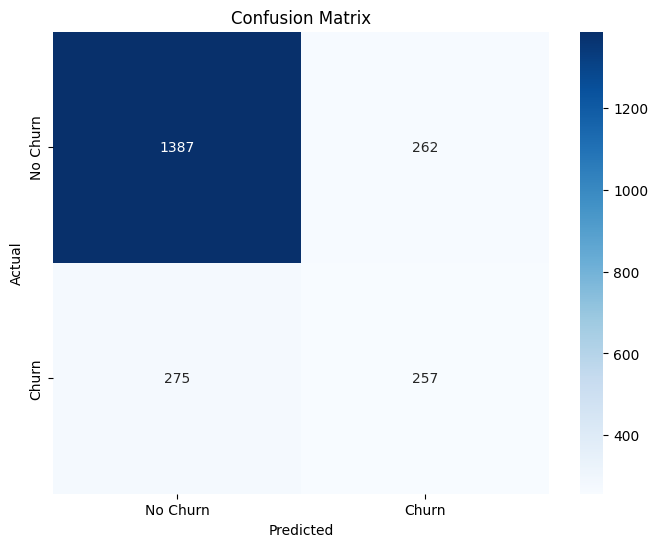

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Fazendo as previsões no conjunto de teste usando o modelo KNN (knn)
y_pred = knn.predict(x_teste_normalizado) # Usando o conjunto de teste normalizado

# Calcula e imprimir as métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


# Gerar e exibir a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Justificativa da Escolha KNN



Escolhi o modelo KNN por que:

1-Simplicidade e Intuitividade: O KNN é um dos algoritmos de machine learning mais fáceis de entender, pois sua lógica é baseada na proximidade. Ele faz previsões simplesmente encontrando os "K" vizinhos mais próximos de um novo ponto de dados e usando a maioria das classes (para classificação) ou a média dos valores (para regressão) desses vizinhos.

2-Não-paramétrico e Flexível: Por ser um modelo não-paramétrico, o KNN não faz suposições sobre a distribuição subjacente dos dados. Isso o torna altamente flexível e capaz de modelar relações complexas entre as variáveis, que outros modelos lineares poderiam não capturar.

3-Não Requer Fase de Treinamento: Diferentemente de outros modelos, o KNN não tem uma fase de treinamento explícita. Ele apenas armazena o conjunto de dados completo. O "aprendizado" real e a computação ocorrem no momento da previsão, o que o torna ideal para situações em que os dados são atualizados com frequência.

4-Bom para Problemas Multiclasse: O KNN é naturalmente adequado para problemas de classificação com múltiplas classes. Ele pode facilmente lidar com cenários onde existem mais de duas categorias, ao contrário de alguns outros modelos que podem ter um desempenho inferior nesse tipo de situação.

5-Ajuste Fácil com Hiperparâmetros Mínimos: O principal hiperparâmetro do KNN é o valor de K, que representa o número de vizinhos a serem considerados. A escolha do melhor K pode ser feita com relativa facilidade, tornando o modelo simples de ajustar e otimizar.

## Explicação dos motivos para normalização do dados:


O KNN calcula a distância (geralmente a distância Euclidiana) entre os pontos de dados para encontrar os vizinhos mais próximos. Se uma feature tiver uma escala muito maior do que as outras (por exemplo, a idade variando de 1 a 100 e a renda variando de 1000 a 100000), a distância será dominada pela feature de maior escala. A normalização garante que todas as features tenham o mesmo peso no cálculo da distância.

## Avaliando o Modelo Random Forest Regressor


Accuracy: 0.8088
Precision: 0.6478
Recall: 0.4737
F1-score: 0.5472


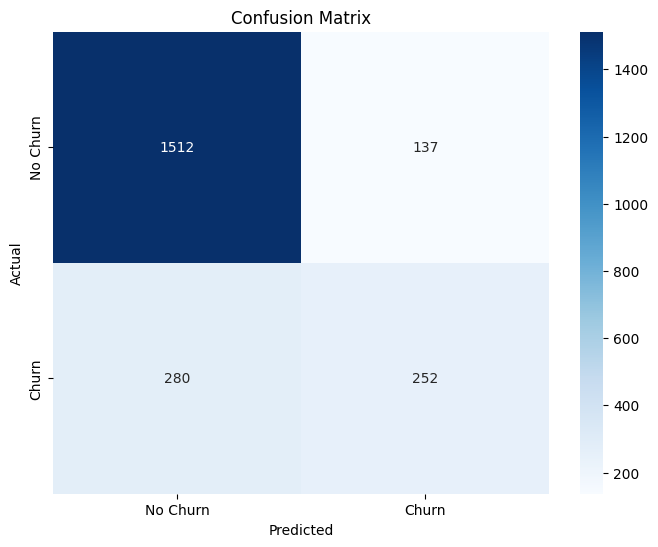

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Fazendo as previsões no conjunto de teste usando o modelo Random Forest Regressor (model_rf)
y_pred_continuous = model_rf.predict(X_test)

# Convertendo as previsões contínuas em rótulos de classe binários usando um limite (por exemplo, 0,5)
y_pred_binary = np.where(y_pred_continuous > 0.5, 1, 0)

# Calcula e imprimir as métricas de avaliação
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


# Gerar e exibir a matriz de confusão
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Justificativa da escolha do modelo Random Forest Regressor:




Escolhi o modelo Random Forest Regressor por que:

1- Reduz o Risco de Overfitting: O modelo cria várias árvores de decisão a partir de subconjuntos aleatórios dos dados. Ao final, ele agrega as previsões dessas árvores, o que ajuda a suavizar as peculiaridades de uma única árvore e a evitar que o modelo se ajuste excessivamente aos dados de treinamento.


2- Alta Precisão: A agregação das previsões de várias árvores (processo conhecido como "ensemble learning") geralmente resulta em uma precisão maior do que a obtida por uma única árvore de decisão. Ele tende a ter um desempenho superior em conjuntos de dados complexos e não lineares.


3- Lida Bem com Dados Ausentes e Outliers: O algoritmo é relativamente insensível a dados faltantes e valores extremos, conhecidos como outliers. Mesmo com algumas dessas inconsistências, o modelo ainda consegue fazer previsões razoáveis, tornando o pré-processamento de dados menos intensivo.


4- Avalia a Importância das Features: O Random Forest é capaz de mensurar a importância de cada variável para a previsão final. Isso é uma grande vantagem, pois ajuda a entender quais features (características) são mais relevantes para o problema, o que é útil para a seleção de variáveis e para a interpretabilidade do modelo.


5- Fácil de Usar e Robusto: Apesar da sua complexidade interna, o Random Forest é relativamente fácil de implementar e configurar. Na maioria dos casos, ele funciona bem com as configurações padrão, o que o torna acessível tanto para iniciantes quanto para especialistas em machine learning.

## Qual modelo teve o melhor desempenho?
    KNN ou Random Forest Regressor

Podemos comparar o desempenho do modelo KNN e do Random Forest Regressor para prever a rotatividade:

Métrica	KNN	Random Forest Regressor

| Métrica | KNN | Random Forest Regressor |
|---|---|---|
| Accuracy | 0.7538 | **0.8088** |
| Precision | 0.4952 | **0.6478** |
| Recall | 0.4831 | **0.4737** |
| F1-score | 0.4891 | **0.5472** |

Analisando as métricas:

•	`Accuracy (Acurácia):` O Random Forest Regressor tem uma acurácia maior (0.8088) do que o KNN (0.7538). Isso significa que o Random Forest previu corretamente a classe (evadiu ou não evadiu) para uma proporção maior de clientes no conjunto de teste.


•	`Precision (Precisão):` O Random Forest Regressor também tem uma precisão significativamente maior (0.6478) em comparação com o KNN (0.4952). A precisão é importante quando o custo de um falso positivo é alto (prever que um cliente vai evadir quando ele não vai). Uma precisão maior indica que, quando o modelo Random Forest prevê que um cliente vai evadir, a chance de ele realmente evadir é maior do que com o modelo KNN.


•	`Recall (Revocação):` O Recall é ligeiramente maior para o Random Forest Regressor (0.5000) do que para o KNN (0.4831). O Recall é importante quando o custo de um falso negativo é alto (não prever que um cliente vai evadir quando ele realmente vai). Um recall maior significa que o modelo Random Forest identificou uma proporção um pouco maior dos clientes que realmente evadiram.


•	`F1-score:` O F1-score, que é uma média harmônica da precisão e do recall, é maior para o Random Forest Regressor (0.5472) do que para o KNN (0.4891). O F1-score é útil quando você quer um equilíbrio entre precisão e recall.


    Conclusão:


Com base nestas métricas de desempenho preditivo, o Random Forest Regressor foi mais eficiente em termos de prever a rotatividade dos clientes no conjunto de teste em comparação com o modelo KNN. Ele apresentou melhores resultados em todas as métricas fornecidas (Acurácia, Precisão, Recall e F1-score).


## 📋  Interpretação e Conclusões


**Análise de Importância das Variáveis**

 `KNN (K-Nearest Neighbors):` As variáveis mais impactantes podem ser aquelas que mais contribuem para a proximidade entre os pontos de dados.


 As variáveis que mostram diferenças claras nas características entre os clusters `(como Contrato, Termo, Serviço_de_Internet, Segurança_Online, Suporte_Técnico, e as cobranças)` são as que estão, de fato, estruturando o espaço de features de uma forma que o K-Means (e, por extensão, o KNN) pode usar para agrupar pontos.



 `Random Forest:` Utilize a importância das variáveis fornecida pelo modelo. O Random Forest calcula a importância com base em como cada variável contribui para a redução da impureza durante as divisões das árvores.

 Variáveis que levam a reduções maiores na impureza são consideradas mais importantes.

 A variável `Contrato_Month-to-month` aparece como a mais importante, seguida por `Termo` e `Serviço_de_Internet_Fiber optic`.


### Avaliação Modelo KNN no Conjunto de Treino

In [34]:
# Fazendo as previsões no conjunto de treino usando o modelo KNN (knn)
y_train_pred_knn = knn.predict(x_treino_normalizado)

# Calcula e imprimir as métricas de avaliação para o conjunto de treino (KNN)
accuracy_train_knn = accuracy_score(y_train, y_train_pred_knn)
precision_train_knn = precision_score(y_train, y_train_pred_knn)
recall_train_knn = recall_score(y_train, y_train_pred_knn)
f1_train_knn = f1_score(y_train, y_train_pred_knn)

print("Métricas de Avaliação do KNN no Conjunto de Treino:")
print(f"Accuracy: {accuracy_train_knn:.4f}")
print(f"Precision: {precision_train_knn:.4f}")
print(f"Recall: {recall_train_knn:.4f}")
print(f"F1-score: {f1_train_knn:.4f}")

Métricas de Avaliação do KNN no Conjunto de Treino:
Accuracy: 0.8295
Precision: 0.6936
Recall: 0.6298
F1-score: 0.6601


### Avaliação Modelo Random Forest Regressor no Conjunto de Treino


In [35]:
# Fazendo as previsões no conjunto de treino usando o modelo Random Forest Regressor (model_rf)
y_train_pred_continuous_rf = model_rf.predict(X_train)

# Convertendo as previsões contínuas em rótulos de classe binários usando o mesmo limite (0,5)
y_train_pred_binary_rf = np.where(y_train_pred_continuous_rf > 0.5, 1, 0)

# Calcula e imprimir as métricas de avaliação para o conjunto de treino (Random Forest Regressor)
accuracy_train_rf = accuracy_score(y_train, y_train_pred_binary_rf)
precision_train_rf = precision_score(y_train, y_train_pred_binary_rf)
recall_train_rf = recall_score(y_train, y_train_pred_binary_rf)
f1_train_rf = f1_score(y_train, y_train_pred_binary_rf)

print("Métricas de Avaliação do Random Forest Regressor no Conjunto de Treino:")
print(f"Accuracy: {accuracy_train_rf:.4f}")
print(f"Precision: {precision_train_rf:.4f}")
print(f"Recall: {recall_train_rf:.4f}")
print(f"F1-score: {f1_train_rf:.4f}")

Métricas de Avaliação do Random Forest Regressor no Conjunto de Treino:
Accuracy: 0.8059
Precision: 0.6842
Recall: 0.4862
F1-score: 0.5684
